In [22]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt

Clean

In [78]:
data = 'D:\\Shreeram\\Projects\\xyz\\CNN\\emodata'

In [17]:
img_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [18]:
for img_class in os.listdir(data):
    print(img_class)

angry
fear
happy
sad
surprised


In [20]:
os.listdir(os.path.join(data, 'happy'))

['-and-happy-man-with-a-beard-and-white-shirt-dot-photocase-stock-photo-large.jpeg',
 '05-12-21-happy-people.jpg',
 '1.jpg',
 '1000_F_194102242_uiIlyJVcmbJ1rMCWbYxGz6AP4AfYOtF9.jpg',
 '1000_F_303704831_0lfmbfqH4z2wfPDUQZxMsRyA6Rw2Al61.jpg',
 '1000_F_303760482_0We7GHMM1Tkw9q7wuYOecrHgqXke9Cl0.jpg',
 '130629134-portrait-of-happy-man-on-blue-background-with-cheerful-smile-on-face-lucky-person.jpg',
 '13ryLrJDyVF05wXDYYUXcJQ.jpeg',
 '170404-happy-workers-feature.jpg',
 '17630025296_e16f4ffe0c_o.jpg',
 '19eedf58c6a884eaec995907d3b4fe95.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '201310-orig-happy-work-3-949x534.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '24-244483_happy-face-people-png-transparent-png.png',
 '29-291804_world-people-happy-man-kid-male-girl-faces.png',
 '292115365.jpg',
 '318920695.jpg',
 '35438_hd.jpg',
 '6c0fbacf84b145add61439ce76e391b7.jpg',
 '77087478-headshot-of-happy-face-of-asian-man-with-beard-and-mustache.jpg',
 '8e06de1bf2171da23

In [21]:
for img_class in os.listdir(data): 
    for img in os.listdir(os.path.join(data, img_class)):
        img_path = os.path.join(data, img_class, img)
        try: 
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in img_exts: 
                print('img not in ext list {}'.format(img_path))
                os.remove(img_path)
        except Exception as e: 
            print('Issue with image {}'.format(img_path))
            # os.remove(img_path)

img not in ext list D:\Shreeram\Projects\xyz\CNN\emodata\fear\1693539840-fearv3.jpg
img not in ext list D:\Shreeram\Projects\xyz\CNN\emodata\fear\child-scared-before-going-bed-260nw-2109215756.jpg
img not in ext list D:\Shreeram\Projects\xyz\CNN\emodata\fear\fear-of-authority-figures.jpg
img not in ext list D:\Shreeram\Projects\xyz\CNN\emodata\fear\fear-terror-scared-1200x628-facebook-1200x628.jpg
img not in ext list D:\Shreeram\Projects\xyz\CNN\emodata\fear\ommetaphobia-1356x892.gif
img not in ext list D:\Shreeram\Projects\xyz\CNN\emodata\fear\paranoid-delusion-scared-woman-screaming-260nw-2262404299.jpg
img not in ext list D:\Shreeram\Projects\xyz\CNN\emodata\fear\scopophobia-fear-of-being-seen.webp
img not in ext list D:\Shreeram\Projects\xyz\CNN\emodata\fear\young-girl-covered-her-face-260nw-582597946.jpg
img not in ext list D:\Shreeram\Projects\xyz\CNN\emodata\happy\close-photo-charming-guy-entrepreneur-260nw-1531460651.jpg
img not in ext list D:\Shreeram\Projects\xyz\CNN\emodata\

Load Data

In [79]:
data = tf.keras.utils.image_dataset_from_directory(data)

Found 620 files belonging to 5 classes.


In [80]:
data_iterator = data.as_numpy_iterator()

In [81]:
batch = data_iterator.next()

In [82]:
batch[0].shape, batch[0].min(), batch[0].max(), len(batch)

((32, 256, 256, 3), 0.0, 255.0, 2)

In [83]:
# Shape shows batches of 32, size of 256 by 256 and colors as RGB.
# Batch min nd max values confirm images being values between 0 and 255 for the colours or you can say pixel values conveying light intensity
# Length tells that there exist two things : one is classes and another is labels

In [84]:
batch[0]

array([[[[ 89.5625   , 100.19629  ,  86.73242  ],
         [ 89.49512  , 101.25488  ,  88.83887  ],
         [ 88.41211  , 103.668945 ,  87.31836  ],
         ...,
         [ 96.731445 , 119.356445 ,  99.450195 ],
         [ 95.90137  , 117.62012  ,  96.71387  ],
         [ 93.53125  , 115.0625   ,  94.25     ]],

        [[ 14.067383 ,  40.379883 ,  16.504883 ],
         [ 15.53125  ,  42.40625  ,  18.25     ],
         [ 14.75     ,  44.9375   ,  17.794922 ],
         ...,
         [ 23.375    ,  64.40625  ,  36.96875  ],
         [ 23.654297 ,  62.685547 ,  34.091797 ],
         [ 23.129883 ,  60.603516 ,  32.098633 ]],

        [[ 17.66211  ,  51.46875  ,  18.606445 ],
         [ 16.9375   ,  50.9375   ,  17.173828 ],
         [ 14.124023 ,  50.966797 ,  15.094727 ],
         ...,
         [ 23.19043  ,  70.68848  ,  38.19043  ],
         [ 21.975586 ,  67.913086 ,  34.444336 ],
         [ 19.768555 ,  64.856445 ,  31.8125   ]],

        ...,

        [[ 25.05664  ,  45.331055 ,  5

In [85]:
batch[1]

array([2, 0, 3, 0, 3, 4, 2, 1, 4, 4, 0, 4, 2, 0, 1, 0, 4, 0, 3, 0, 1, 4,
       3, 4, 3, 3, 0, 2, 3, 3, 0, 4])

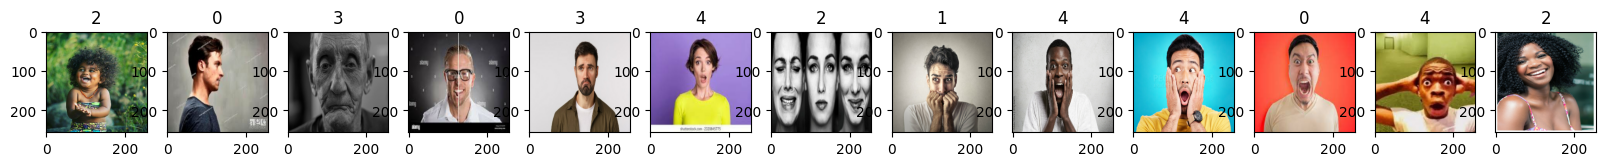

In [89]:
fig, ax = plt.subplots(ncols = 13, figsize=(20,20))
for idx, img in enumerate(batch[0][:13]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [90]:
# {classes : labels} - {angry : 0, fear : 1, happy : 2, sad : 3, surprised : 4} These are exactly the same as the sequence of folders in data folder

Scale Data

In [91]:
data = data.map(lambda X, y : (X/255, y))

In [92]:
scaled = data.as_numpy_iterator()

In [93]:
batch = scaled.next()

In [96]:
batch[0].min(), batch[0].max()

(0.0, 1.0)

In [97]:
len(data)

20

In [98]:
620/32

19.375

In [99]:
#Thats total number of batches we have, with each batch size of 32

Split Data

In [100]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [101]:
train_size, val_size, test_size

(14, 4, 2)

In [102]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Train the Model

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [115]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [116]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [118]:
logdir='logs'

In [119]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [120]:
model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20




14/14 [==============================] - 19s 1s/step - loss: 1.6530 - accuracy: 0.2522 - val_loss: 1.5205 - val_accuracy: 0.3359
Epoch 2/20
14/14 [==============================] - 13s 852ms/step - loss: 1.4527 - accuracy: 0.3951 - val_loss: 1.2830 - val_accuracy: 0.5703
Epoch 3/20
14/14 [==============================] - 13s 857ms/step - loss: 1.1735 - accuracy: 0.5804 - val_loss: 1.1014 - val_accuracy: 0.6172
Epoch 4/20
14/14 [==============================] - 14s 901ms/step - loss: 0.8832 - accuracy: 0.7121 - val_loss: 0.8724 - val_accuracy: 0.7188
Epoch 5/20
14/14 [==============================] - 14s 910ms/step - loss: 0.6514 - accuracy: 0.7768 - val_loss: 0.4191 - val_accuracy: 0.9062
Epoch 6/20
14/14 [==============================] - 14s 940ms/step - loss: 0.4025 - accuracy: 0.8906 - val_loss: 0.3401 - val_accuracy: 0.9141
Epoch 7/20
14/14 [==============================] - 16s 1s/step - loss: 0.3296 - accuracy: 0.9040 - val_loss: 0.2114 - val_accuracy: 0.9531
Epoch 8/20
14/

In [127]:
model.evaluate(test)

2/2 [==============================] - 4s 43ms/step - loss: 0.0028 - accuracy: 1.0000


[0.002778436755761504, 1.0]

Performance

In [130]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [150]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [152]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    
    # Convert predictions to class indices
    y_pred_classes = np.argmax(yhat, axis=1)
    
    # Update metrics
    pre.update_state(y, y_pred_classes)
    re.update_state(y, y_pred_classes)
    acc.update_state(y, y_pred_classes)


1/1 [==============================] - 0s 134ms/step


In [153]:
yhat[:5].round()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [154]:
y_pred_classes[:5]

array([1, 0, 2, 2, 1], dtype=int64)

In [155]:
pre.result().numpy(), re.result().numpy(), acc.result().numpy()

(1.0, 1.0, 1.0)

Test

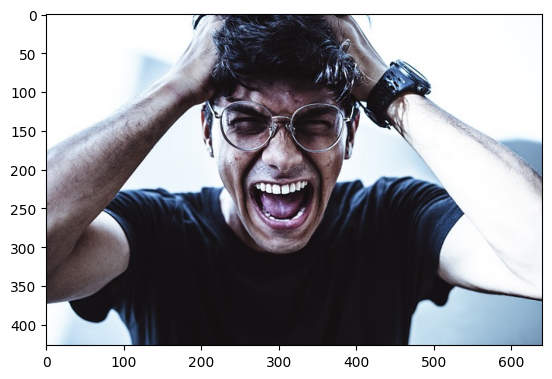

In [207]:
# happy test
img = cv2.imread('D:\\Shreeram\\Projects\\xyz\\CNN\\angrytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [208]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

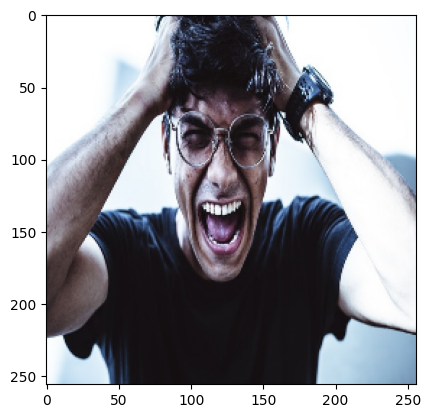

In [209]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [210]:
pred = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 50ms/step


In [211]:
pred

array([[9.9991834e-01, 6.0183197e-07, 7.3955540e-05, 1.4072161e-07,
        7.0383599e-06]], dtype=float32)

In [212]:
pred = np.argmax(pred, axis=1)

In [213]:
pred = pred.max().round().astype(int)

In [214]:
if pred == 0:
    print(f'Predicted class is Angry')
elif pred == 1:
    print(f'Predicted class is Fear')
elif pred == 2:
    print(f'Predicted class is Happy')
elif pred == 3:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Surprised')

Predicted class is Angry


Save Model

In [215]:
model.save('emotion_detection.h5')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [216]:
model.save('emotion_detector.keras')

In [2]:
from tensorflow.keras.models import load_model

In [3]:
deploy_model = load_model('emotion_detection.h5')

In [4]:
import numpy as np

In [ ]:
import gradio as gr
from PIL import Image

# Define class names
class_names = {
    0: 'Emotion is Angry',
    1: 'Emotion is Fear',
    2: 'Emotion is Happy',
    3: 'Emotion is Sad',
    4: 'Emotion is Surprised'
}

# Define a function to make predictions
def classify_image(image):
    # Resize the image to the required input shape
    image = Image.fromarray(image.astype('uint8'), 'RGB')
    image = image.resize((256, 256))
    
    # Convert image to numpy array
    image = np.array(image) / 255.0  # Normalize the pixel values
    
    # Make prediction
    prediction = deploy_model.predict(np.expand_dims(image, axis=0))
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]
    
    return predicted_class_name

interface = gr.Interface(
    fn=classify_image, 
    inputs="image", 
    outputs="text", 
    title='Image Classifier', 
    description='Upload an image to classify'
)

interface.launch()